---
---
## Importacion de datos, librerías y configuraciones.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from config import *

df_productos = pd.read_pickle(f"{DATOS_RUTA_TRATADOS}/info_productos.pkl")

---
---
## Clustering Productos

In [2]:
df_productos.sample(3)

,Product Name,Category,Sub-Category,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders
1998,"Ikea 3-Shelf Cabinet, Traditional",Furniture,Bookcases,4560.93,41,1369.23,0.21,38.16,105.76,12
2486,"Nokia Headset, Full Size",Technology,Phones,3656.26,53,441.66,0.04,30.56,68.02,15
1268,"Elite 5"" Scissors",Office Supplies,Supplies,179.14,24,37.18,0.09,2.91,7.73,7


#### Encodeamos

In [3]:
df_productos_copia = df_productos.copy()

In [4]:
clus_prep = sup_clus.Preprocesado(df_productos_copia)

In [5]:
encoded_df_prod = clus_prep.codificar()
encoded_df_prod.sample()

,Product Name,Category,Sub-Category,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders
3443,0.00,0.55,0.07,402.82,22,-26.43,0.10,4.42,18.88,6


#### Estandarizamos

In [6]:
escalador = sup_fea.RobustScaler()

standardized_df_prod = escalador.fit_transform(encoded_df_prod)
standardized_df_prod = pd.DataFrame(standardized_df_prod, columns=df_productos.columns, index=df_productos.index)
standardized_df_prod.sample(3)

,Product Name,Category,Sub-Category,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders
1122,0.00,0.00,0.00,1.21,-0.43,3.17,-0.52,1.23,3.83,-0.29
1425,0.00,0.00,0.00,-0.22,-0.39,-0.28,-0.46,-0.14,-0.02,-0.14
2435,0.00,0.00,0.20,-0.34,-0.10,-0.21,-0.57,-0.33,-0.33,-0.07


---
---
## DBSCAN Clustering

In [7]:
clustering = sup_clus.Clustering(standardized_df_prod)

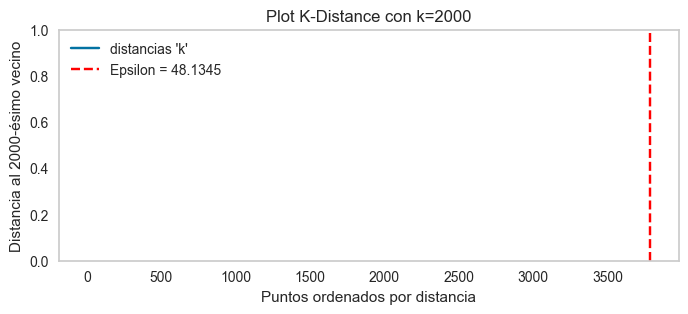

In [8]:
epsilon = clustering.plot_epsilon(standardized_df_prod, 2000, (8,3), (0,1))

In [9]:
df_dbscan = clustering.modelo_dbscan(standardized_df_prod, eps_values=[5, 10, 20, 30, 40, 48.1, 55], min_samples_values=[1000, 1500, 2000, 2500])

Iterando sobre eps y min_samples: 100%|██████████| 7/7 [00:12<00:00,  1.80s/it]


,eps,min_samples,silhouette_score,davies_bouldin_score,cardinality
19,40,2500,0.94,0.04,"{-1: 1, 0: 3787}"
18,40,2000,0.94,0.04,"{-1: 1, 0: 3787}"
17,40,1500,0.94,0.04,"{-1: 1, 0: 3787}"
16,40,1000,0.94,0.04,"{-1: 1, 0: 3787}"
15,30,2500,0.94,0.04,"{-1: 1, 0: 3787}"
14,30,2000,0.94,0.04,"{-1: 1, 0: 3787}"
13,30,1500,0.94,0.04,"{-1: 1, 0: 3787}"
12,30,1000,0.94,0.04,"{-1: 1, 0: 3787}"
11,20,2500,0.91,0.71,"{-1: 4, 0: 3784}"
10,20,2000,0.91,0.71,"{-1: 4, 0: 3784}"


Mejor modelo: eps=30, min_samples=1000, silhouette_score=0.9364
Se han generado 2 clusters (incluyendo outliers, si los hay).


<h2 style="color: red">como no me convencen las cardinalidades que nos da el dbscan, pasamos al KMEANS</h2>

---
---
## KMEANS Clustering

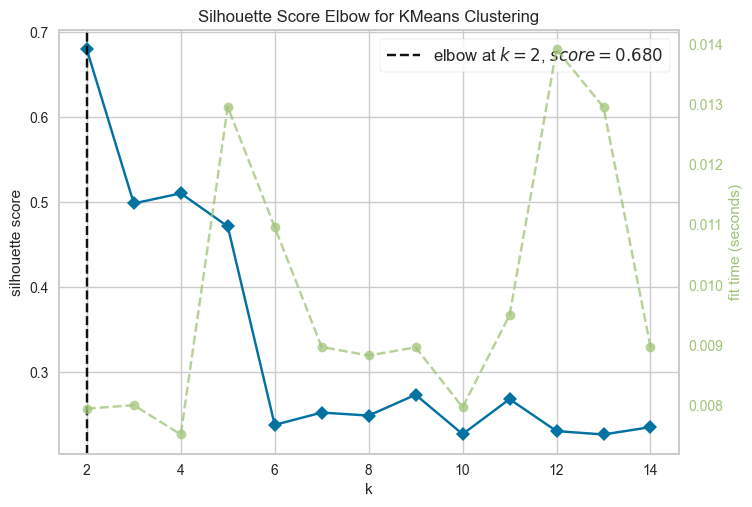

In [10]:
clustering = sup_clus.Clustering(standardized_df_prod)

clustering.sacar_clusters_kmeans()

In [11]:
clustering.calcular_confs_vinculacion_distancia_aglomerativo(standardized_df_prod)

Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric

,linkage,metric,silhouette_score,davies_bouldin_index,cluster_cardinality,n_cluster
0,complete,euclidean,0.85,0.62,"{0: 8, 1: 3776, 2: 4}",3
1,complete,euclidean,0.85,0.49,"{0: 3776, 1: 7, 2: 4, 3: 1}",4
14,complete,chebyshev,0.82,0.61,"{0: 43, 1: 3, 2: 3742}",3
15,complete,chebyshev,0.81,0.49,"{0: 3742, 1: 3, 2: 42, 3: 1}",4
2,complete,euclidean,0.73,0.59,"{0: 89, 1: 3687, 2: 4, 3: 1, 4: 7}",5
5,complete,euclidean,0.72,0.59,"{0: 78, 1: 7, 2: 11, 3: 1, 4: 3, 5: 3686, 6: 1...",8
3,complete,euclidean,0.72,0.74,"{0: 4, 1: 3687, 2: 78, 3: 1, 4: 7, 5: 11}",6
4,complete,euclidean,0.72,0.63,"{0: 3687, 1: 7, 2: 78, 3: 1, 4: 3, 5: 11, 6: 1}",7
6,complete,euclidean,0.71,0.67,"{0: 11, 1: 7, 2: 3686, 3: 2, 4: 3, 5: 76, 6: 1...",9
16,complete,chebyshev,0.67,0.63,"{0: 3, 1: 3717, 2: 42, 3: 1, 4: 25}",5


In [12]:
kmeans = KMeans(n_clusters=4)
km_fit = kmeans.fit(standardized_df_prod)
labels = km_fit.labels_
df_kmeans = standardized_df_prod.copy()
df_kmeans["cluster"] = labels
df_kmeans.reset_index(inplace=True)
df_kmeans.sample(5)

,index,Product Name,Category,Sub-Category,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders,clusters_dbscan,cluster
52,3096,0.00,-1.03,-0.64,5.26,0.47,10.61,-0.06,2.71,3.38,0.71,0,3
1418,1010,0.00,0.00,-0.28,0.33,0.29,0.26,-0.38,0.26,0.26,0.14,0,1
1896,2147,0.00,-1.00,-0.54,-0.13,-0.33,-0.00,-0.03,-0.18,0.11,0.00,0,1
2164,1871,0.00,0.00,-0.49,-0.21,1.57,-0.09,0.46,-0.29,-0.30,1.21,0,1
1405,3577,0.00,0.00,1.15,-0.23,0.06,0.27,-0.97,-0.26,-0.22,0.21,0,1


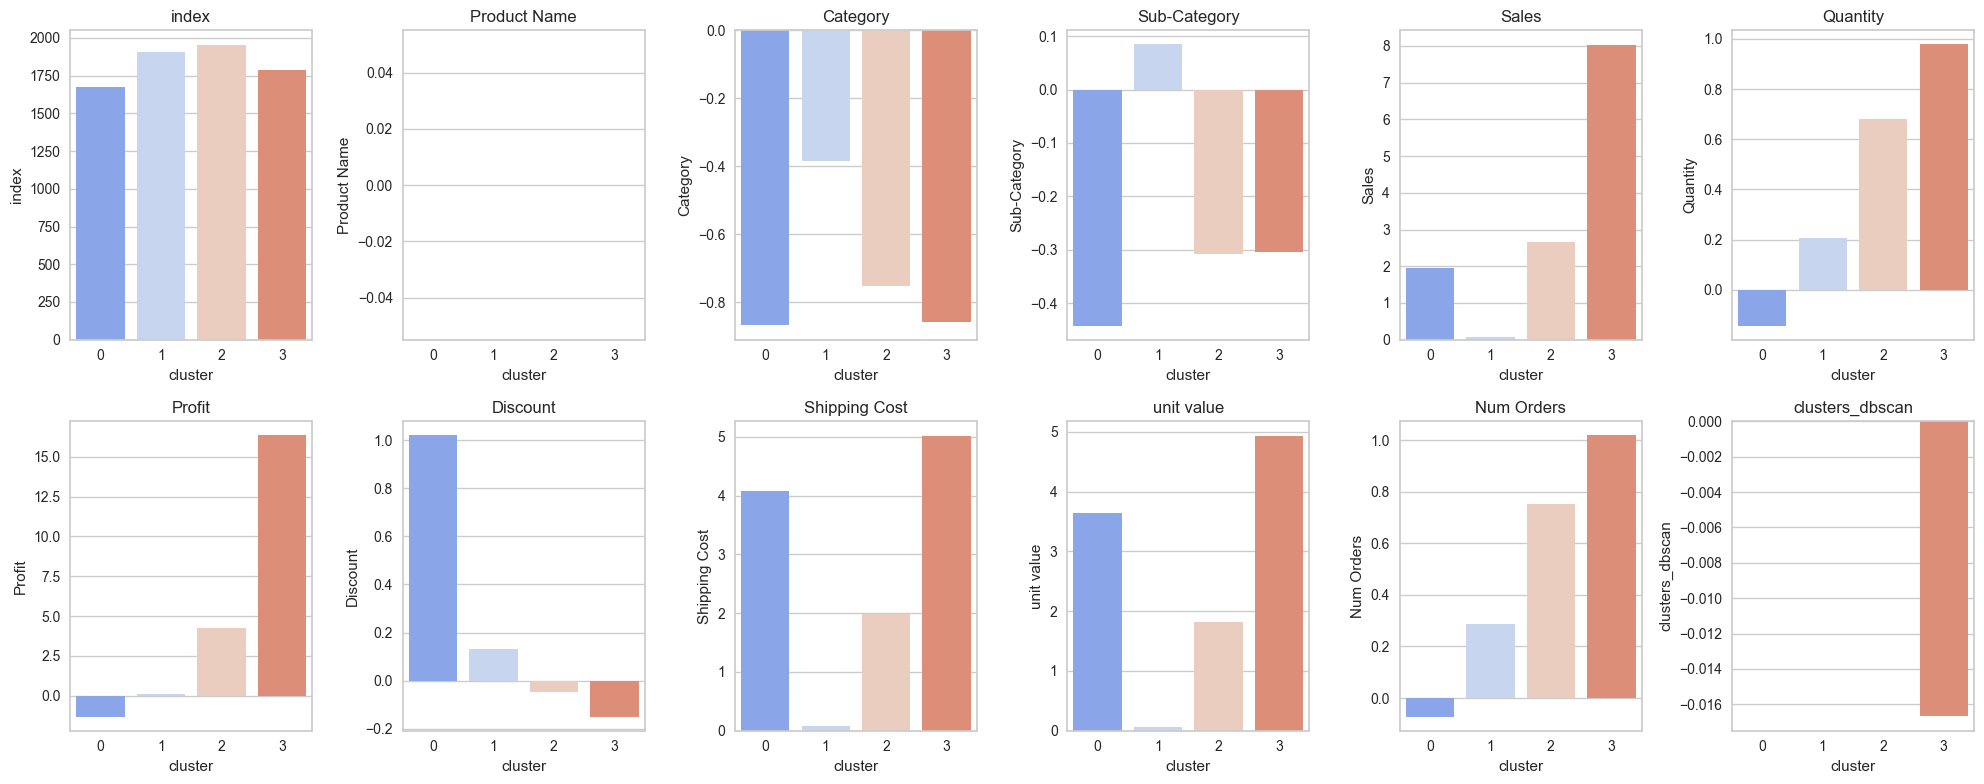

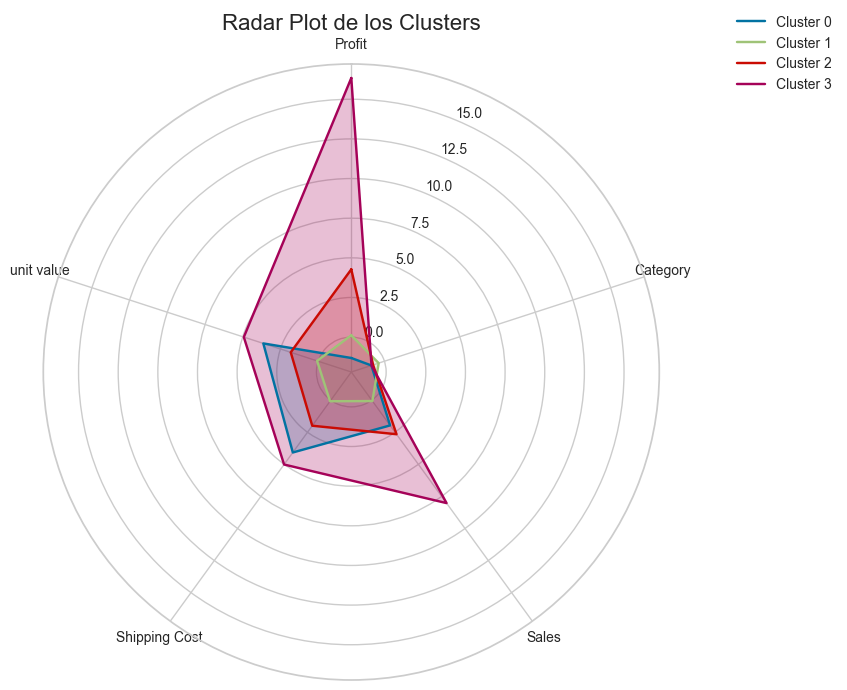

In [13]:
clustering.plot_clusters(df_kmeans, 'cluster')
clustering.visualizar_radar_plot(df_kmeans, 'cluster', ['Profit', 'Category', 'Sales', 'Shipping Cost', 'unit value'])

In [14]:
df_kmeans_copia = df_kmeans.copy()

df_kmeans_copia[df_productos.columns] = df_productos[df_productos.columns]
df_kmeans_copia.sample(3)

,index,Product Name,Category,Sub-Category,Sales,Quantity,Profit,Discount,Shipping Cost,unit value,Num Orders,clusters_dbscan,cluster
489,2771,"BIC Canvas, Water Color",Office Supplies,Art,4615.24,91,-215.54,0.08,19.96,51.15,30,0,2
3664,654,Xerox 1960,Office Supplies,Paper,879.83,32,334.58,0.10,18.45,27.88,6,0,1
2496,3518,"Nokia Signal Booster, Cordless",Technology,Phones,9274.21,76,1629.74,0.09,39.04,119.35,20,0,1


In [15]:
df_kmeans_copia.columns

Index(['index', 'Product Name', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Profit', 'Discount', 'Shipping Cost', 'unit value',
       'Num Orders', 'clusters_dbscan', 'cluster'],
      dtype='object')

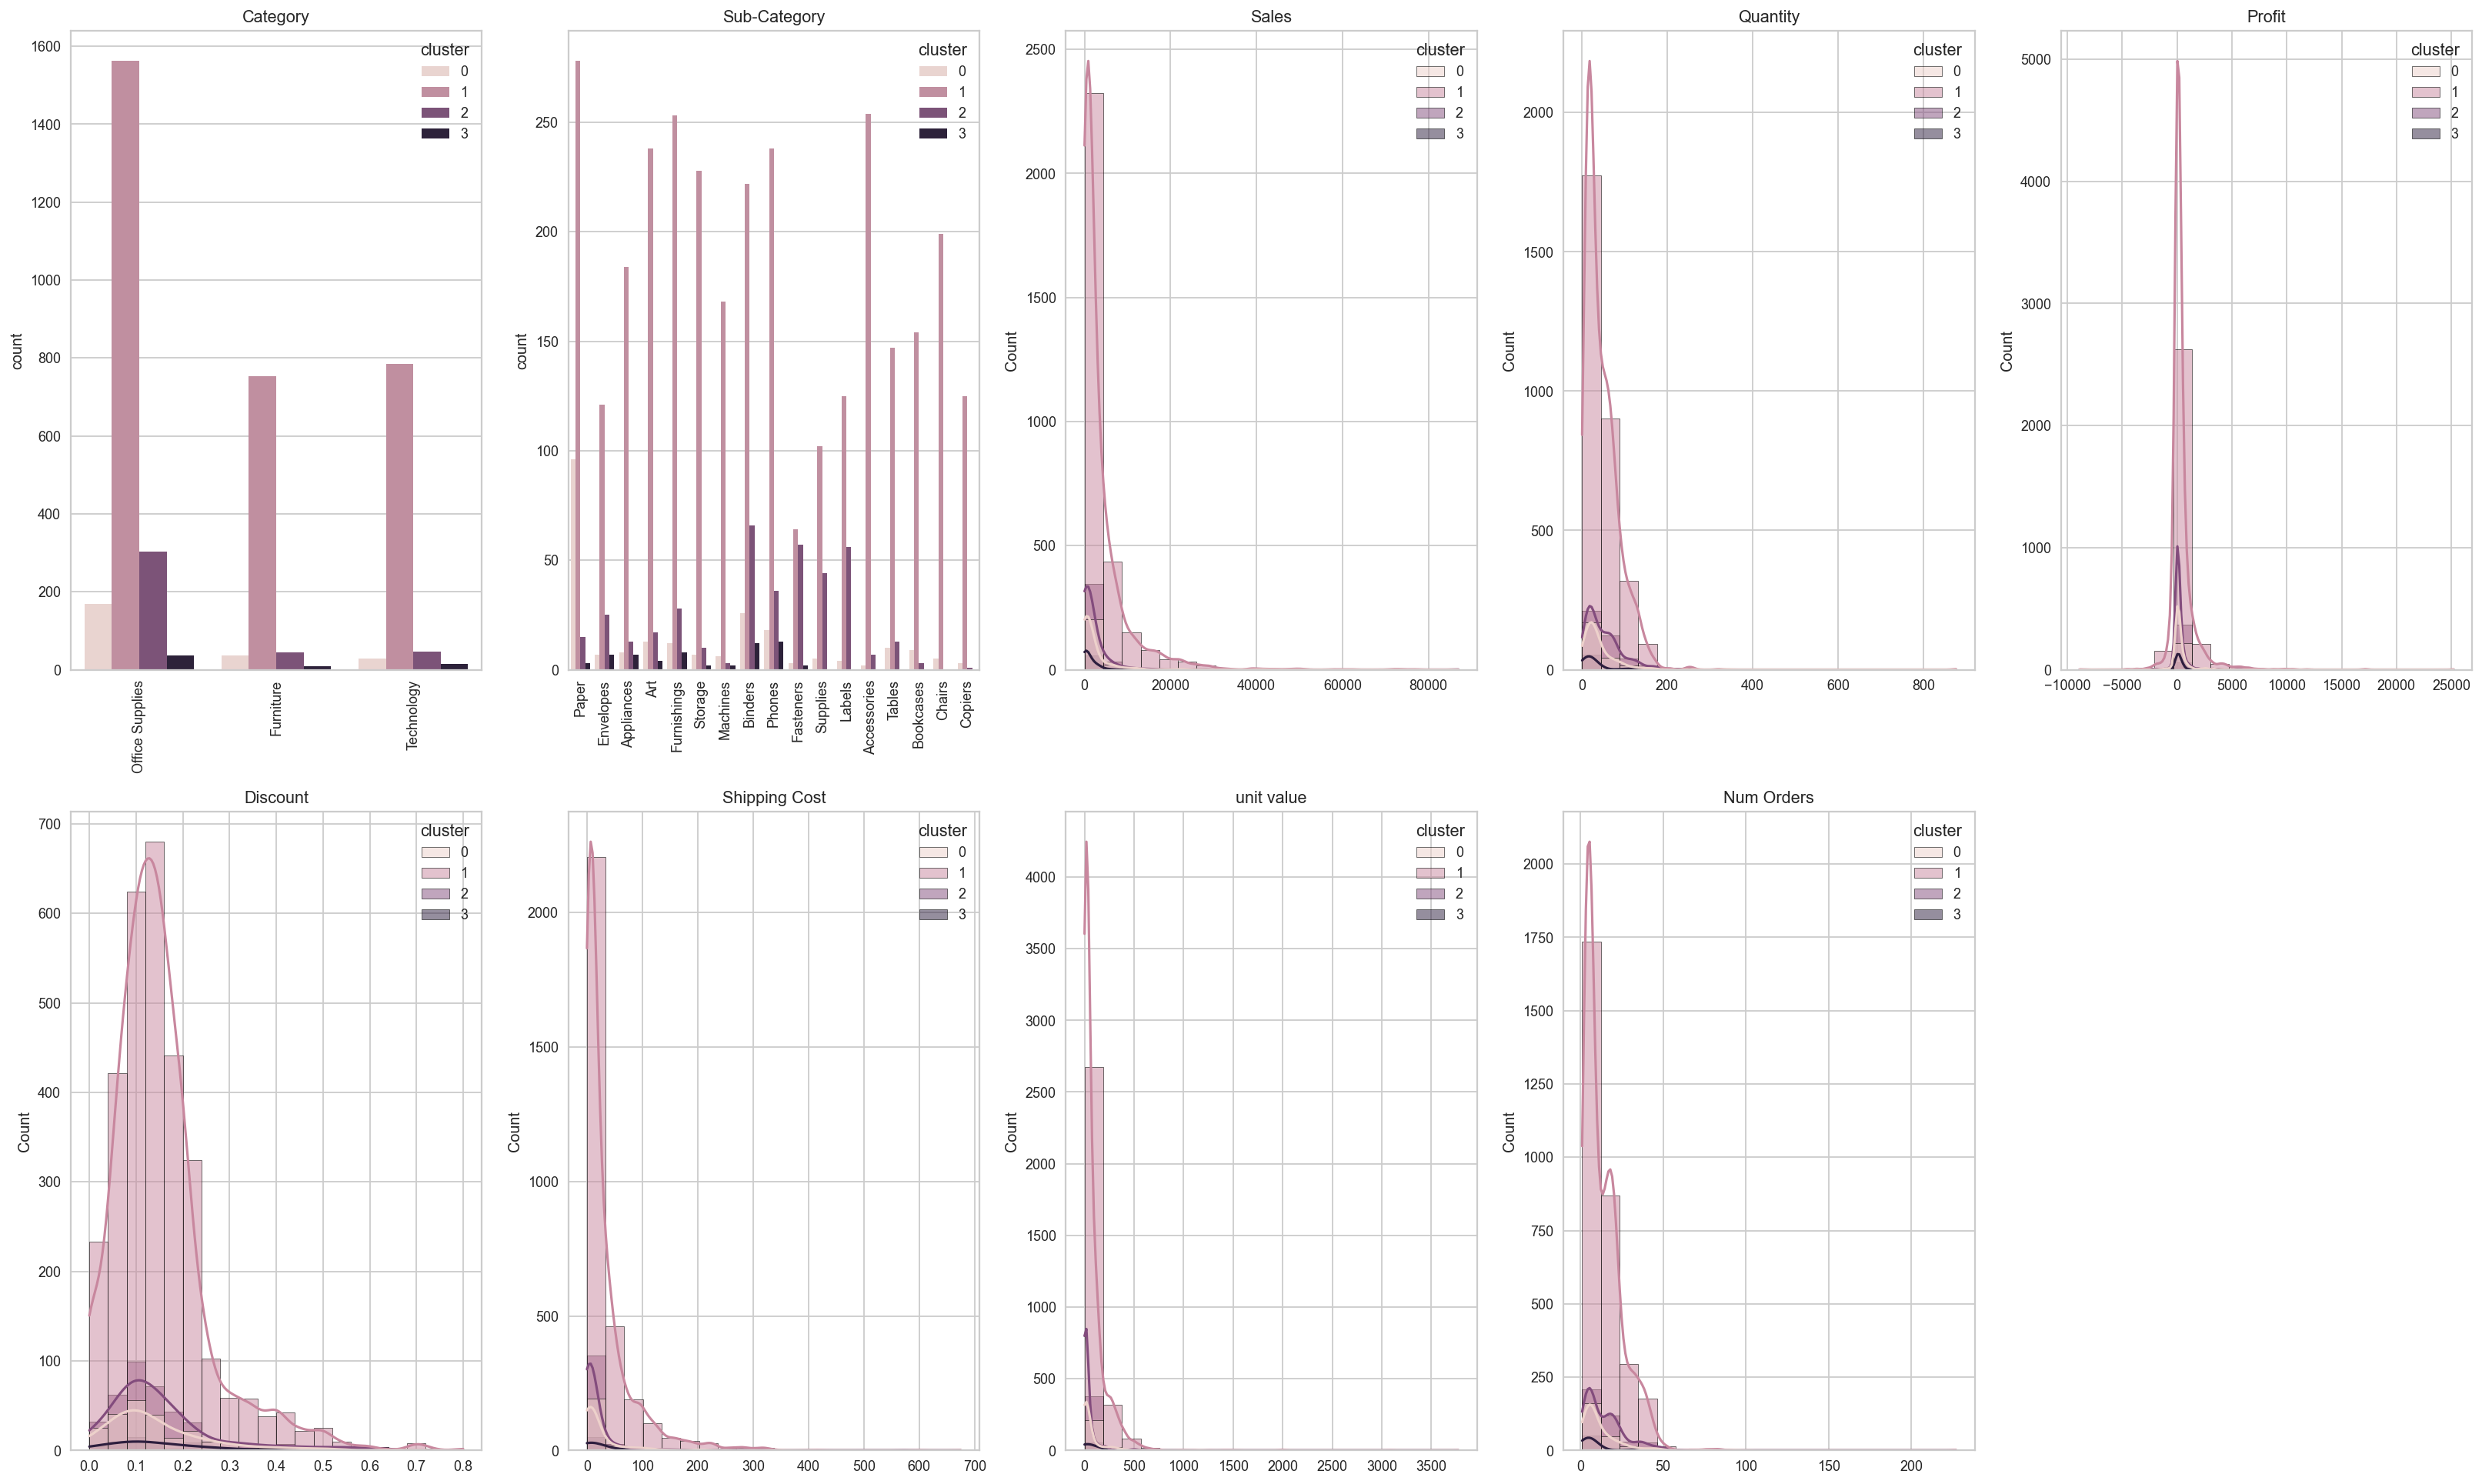

In [16]:
clustering.plot_completo_clusters(data=df_kmeans_copia, x=['Category', 'Sub-Category', 'Sales', 'Quantity', 'Profit', 'Discount', 'Shipping Cost', 'unit value','Num Orders'], hue='cluster')

---
---
## Conclusiones Clusters


A partir de las gráficas de barras, radar plot y distribuciones, las características de los clusters son las siguientes:

---

#### **Cluster 0**: Productos de **alto descuento**, bajo rendimiento  
- **Características Clave**:  
  - **Profit** negativo o cercano a cero.  
  - **Altos valores de descuento** y **shipping cost** moderado.  
  - Ventas y cantidad muy bajas.  
- **Interpretación**:  
  - Estos productos dependen **excesivamente de descuentos** para generar ventas.  
  - Son poco rentables e implican costos de envío moderados.  
- **Recomendación**:  
  - Revisar si vale la pena mantener estos productos.  
  - Optimizar precios para reducir la dependencia de descuentos.  

---

#### **Cluster 1**: Productos de **bajo volumen** y rendimiento insignificante  
- **Características Clave**:  
  - Métricas extremadamente **bajas** en **Sales**, **Quantity**, y **Profit**.  
  - **Unit value** y **shipping cost** cercanos a cero.  
- **Interpretación**:  
  - Representan productos **prácticamente inactivos** o sin demanda.  
  - Tienen la menor relevancia en el conjunto de datos.  
- **Recomendación**:  
  - Considerar **eliminar** estos productos del catálogo.  
  - Realizar un análisis de mercado para entender por qué no tienen demanda.  

---

#### **Cluster 2**: Productos de **alto rendimiento y rentabilidad**  
- **Características Clave**:  
  - **Altas métricas en Profit, Sales, Quantity y Num Orders**.  
  - **Unit value** más alto del conjunto y moderados costos de envío.  
  - **Sin dependencia de descuentos** (bajos valores de descuento).  
- **Interpretación**:  
  - Estos son los productos **más exitosos** y rentables del conjunto de datos.  
  - Generan altos beneficios con un número significativo de ventas y pedidos.  
- **Recomendación**:  
  - Priorizar estos productos en campañas de marketing y logística.  
  - Asegurar su disponibilidad y promocionar productos complementarios (cross-selling).  

---

#### **Cluster 3**: Productos de **rendimiento moderado**  
- **Características Clave**:  
  - Métricas **moderadas** en **Sales**, **Quantity** y **Profit**.  
  - Valores intermedios en **unit value** y **shipping cost**.  
  - **Ligeros descuentos** presentes.  
- **Interpretación**:  
  - Estos productos tienen un rendimiento aceptable, pero hay margen de mejora.  
- **Recomendación**:  
  - Implementar campañas de **promoción controlada** para incrementar ventas sin erosionar márgenes.  
  - Analizar las **subcategorías** de este cluster para identificar áreas con mayor potencial.

---

### **2. Comparación con las Versiones Anteriores**  
La segmentación de **4 clusters** sigue teniendo sentido y resulta efectiva porque:  
1. **Cluster 2** destaca claramente como el grupo de productos **más exitosos**.  
2. **Cluster 0** y **Cluster 1** permiten diferenciar entre productos **no rentables** y productos **sin movimiento**, respectivamente.  
3. **Cluster 3** proporciona un grupo intermedio que se puede **optimizar** con estrategias específicas.  

---

### **3. Resumen de Clasificación Final**
| **Cluster** | **Descripción**                  | **Acciones Recomendadas**                                              |
|-------------|----------------------------------|------------------------------------------------------------------------|
| **Cluster 0** | Productos con alto descuento y bajo rendimiento. | Optimizar precios o evaluar su eliminación.                            |
| **Cluster 1** | Productos sin movimiento.       | Descontinuar o realizar análisis para entender la falta de demanda.   |
| **Cluster 2** | Productos más exitosos.         | Priorizar, promocionar y garantizar disponibilidad.                   |
| **Cluster 3** | Productos de rendimiento moderado. | Mejorar con campañas específicas y analizar subcategorías prometedoras. |

---


---
---
## Agrupamos clusters en dataframes

In [17]:
df_kmeans_copia['cluster'].value_counts()

cluster
1    3100
2     394
0     234
3      60
Name: count, dtype: int64

In [18]:
df_cluster_productos_0 = df_kmeans_copia[df_kmeans_copia['cluster'] == 0]
df_cluster_productos_0.drop(columns=['clusters_dbscan',	'cluster'], inplace=True)

df_cluster_productos_1 = df_kmeans_copia[df_kmeans_copia['cluster'] == 1]
df_cluster_productos_1.drop(columns=['clusters_dbscan',	'cluster'], inplace=True)

df_cluster_productos_2 = df_kmeans_copia[df_kmeans_copia['cluster'] == 2]
df_cluster_productos_2.drop(columns=['clusters_dbscan',	'cluster'], inplace=True)

df_cluster_productos_3 = df_kmeans_copia[df_kmeans_copia['cluster'] == 3]
df_cluster_productos_3.drop(columns=['clusters_dbscan',	'cluster'], inplace=True)

df_kmeans_copia.drop(columns=['clusters_dbscan'], inplace=True)

---
---
## Guardamos los datos (clusters generados)

In [19]:
df_cluster_productos_0.to_pickle(f"{DATOS_RUTA_CLUSTERS}/productos/cluster0_productos.pkl")
df_cluster_productos_1.to_pickle(f"{DATOS_RUTA_CLUSTERS}/productos/cluster1_productos.pkl")
df_cluster_productos_2.to_pickle(f"{DATOS_RUTA_CLUSTERS}/productos/cluster2_productos.pkl")
df_cluster_productos_3.to_pickle(f"{DATOS_RUTA_CLUSTERS}/productos/cluster3_productos.pkl")

df_kmeans_copia.to_pickle(f"{DATOS_RUTA_TRATADOS}/clustered_info_productos.pkl")